<a href="https://colab.research.google.com/github/NAGPALADITI14/Data_Mining/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv('/content/Heart_health.csv')

drop_cols = ['ID','Name']
data=data.drop(columns=[col for col in drop_cols if col in data.columns],errors='ignore')
label_encoder = {}
for col in ['Gender','Smoker']:
  le=LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoder[col] = le

data['Blood Pressure(mmHg)']=data['Blood Pressure(mmHg)'].astype(str).str.split('/').str[0].astype(float)
print(data.head())

   Age  Gender  Height(cm)  Weight(kg)  Blood Pressure(mmHg)  \
0   45       1         175          80                 120.0   
1   35       0         160          65                 110.0   
2   55       1         180          85                 130.0   
3   40       0         165          70                 115.0   
4   50       1         170          75                 125.0   

   Cholesterol(mg/dL)  Glucose(mg/dL)  Smoker  Exercise(hours/week)  \
0                 200              90       0                     3   
1                 180              80       0                     2   
2                 220              95       1                     4   
3                 190              85       0                     3   
4                 210              92       1                     2   

   Heart Attack  
0             0  
1             0  
2             1  
3             0  
4             1  


In [ ]:
X=data.drop(columns=['Heart Attack'])
y=data['Heart Attack']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[118   1]
 [  0 171]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       119
           1       0.99      1.00      1.00       171

    accuracy                           1.00       290
   macro avg       1.00      1.00      1.00       290
weighted avg       1.00      1.00      1.00       290

Accuracy: 0.996551724137931


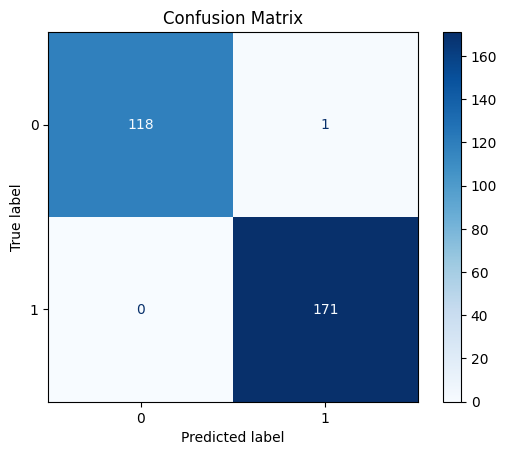

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


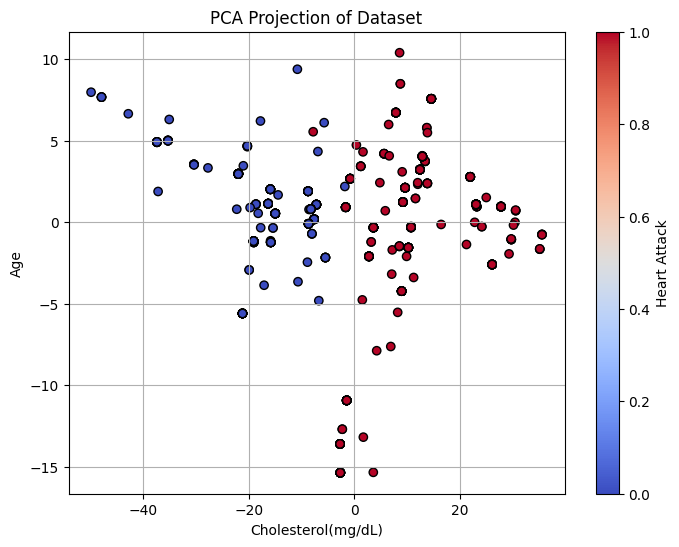

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
loadings = pca.components_
feature_names = X.columns

top_features = []
for i in range(2):
    component = loadings[i]
    top_idx = np.argmax(np.abs(component))
    top_feature = feature_names[top_idx]
    top_features.append(top_feature)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("PCA Projection of Dataset")
plt.xlabel(f"{top_features[0]}")
plt.ylabel(f"{top_features[1]}")
plt.colorbar(label='Heart Attack')
plt.grid(True)
plt.show()
